# Counting lesions from segmentation maps

In [1]:
from fundus_lesions_toolkit.models import segment, list_models
from fundus_lesions_toolkit.utils.images import open_image
from fundus_lesions_toolkit.utils.visualization import plot_image, plot_image_and_mask
from fundus_lesions_toolkit.constants import (
    DEFAULT_COLORS,
    LESIONS,
    Dataset,
    lesions2names,
)

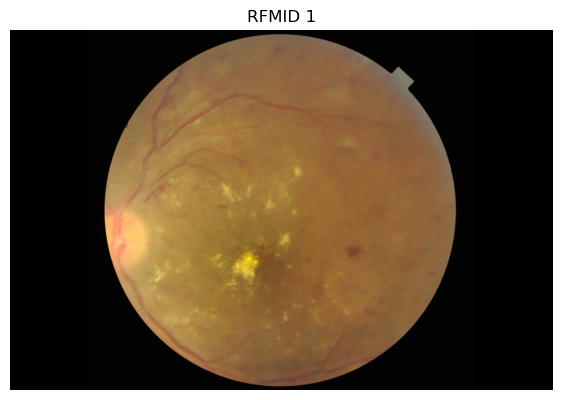

In [2]:
example_path = "../imgs/rfmid_sample_1.png"
img = open_image(example_path)
fsize = (7, 7)
plot_image(img, title="RFMID 1", figsize=fsize)

/home/clement/Documents/Projets/fundus-lesions-toolkit/src/fundus_lesions_toolkit/models/segmentation.py:195: UserWarning: Setting dropout to 0.2
  warnings.warn(f"Setting dropout to {initial_value}")


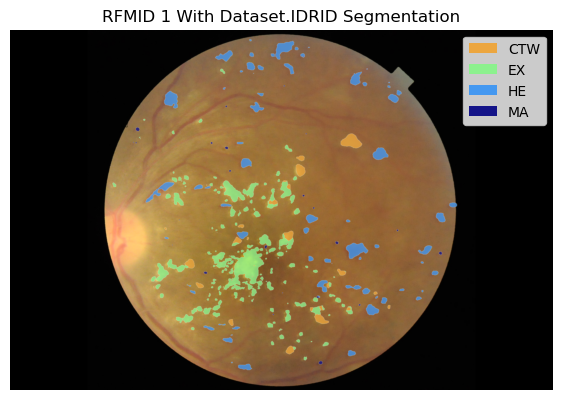

In [3]:
pred = segment(img, device="cuda", train_datasets=Dataset.IDRID, compile=False)
plot_image_and_mask(
    img,
    pred,
    alpha=0.8,
    title=f"RFMID 1 With {Dataset.IDRID} Segmentation",
    figsize=fsize,
    colors=DEFAULT_COLORS,
    labels=LESIONS,
)

In [4]:
import torch
from kornia.contrib import connected_components

discrete_prediction = torch.argmax(pred, dim=0)

SIZE_THRESHOLD = 0

for i, lesion in enumerate(LESIONS):
    if i == 0:
        continue

    mask = discrete_prediction == i
    ccl = connected_components(mask.unsqueeze(0).unsqueeze(0).float())

    unique, count = torch.unique(ccl, return_counts=True, sorted=True)
    nb_components = (count > SIZE_THRESHOLD).sum().item() - 1  # -1 to remove background

    print(f"Number of {lesions2names[lesion]}: {nb_components}")

Number of Cotton Wool Spots: 28
Number of Exudates: 207
Number of Hemorrhages: 82
Number of Microaneurysms: 24


In [19]:
## You can also use it in a single line function (segment + count)


from fundus_lesions_toolkit.models.detection import count_lesions

SIZE_THRESHOLD = 15
nb_lesions = count_lesions(
    img, size_threshold=SIZE_THRESHOLD, device="cuda", train_datasets=Dataset.IDRID
)
print("Number of lesions detected when trained on IDRiD:")
for lesion, count in nb_lesions.items():
    print(f"Number of {lesion}: {count}")


print("=" * 50)
print("Number of lesions detected when trained on MESSIODR:")
nb_lesions = count_lesions(
    img, size_threshold=SIZE_THRESHOLD, device="cuda", train_datasets=Dataset.MESSIDOR
)
for lesion, count in nb_lesions.items():
    print(f"Number of {lesion}: {count}")

print("=" * 50)
print("Number of lesions detected when trained on all datasets:")
nb_lesions = count_lesions(
    img, size_threshold=SIZE_THRESHOLD, device="cuda", train_datasets=Dataset.ALL
)
for lesion, count in nb_lesions.items():
    print(f"Number of {lesion}: {count}")

Number of lesions detected when trained on IDRiD:
Number of Cotton Wool Spots: 23
Number of Exudates: 177
Number of Hemorrhages: 67
Number of Microaneurysms: 18
Number of lesions detected when trained on MESSIODR:
Number of Cotton Wool Spots: 5
Number of Exudates: 151
Number of Hemorrhages: 68
Number of Microaneurysms: 105
Number of lesions detected when trained on all datasets:
Number of Cotton Wool Spots: 1
Number of Exudates: 122
Number of Hemorrhages: 77
Number of Microaneurysms: 6
